# Intro to Signal Processing

In [9]:
%load_ext autoreload
%autoreload 2

import csv
import matplotlib.pyplot as plt
import numpy as np

from biosppy import tools as biosppy_tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Last week, we tried graphing EEG data from the Muse headband ... and it was noisy! :( Don't worry though! This week, we'll learn how to remove the noise with a library called ***biosppy***. Before we do that, we need to load data! Try loading data from `./data/stare_blink/csv` into 4 lists: 1 for each electrode on the Muse! Then graph each list into its own subplot on a MatPlotLib figure :)

In [7]:
# Saving Muse EEG values in list: one for each electrode
l_ear_arr = []
l_forehead_arr = []
r_forehead_arr = []
r_ear_arr = []

with open('./data/stare_blink.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        l_ear = float(row['l_ear'])
        l_forehead = float(row['l_forehead'])
        r_forehead = float(row['r_forehead'])
        r_ear = float(row['r_ear'])
        
        l_ear_arr.append(l_ear)
        l_forehead_arr.append(l_forehead)
        r_forehead_arr.append(r_forehead)
        r_ear_arr.append(r_ear)

c:\miniconda\envs\muse-env\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


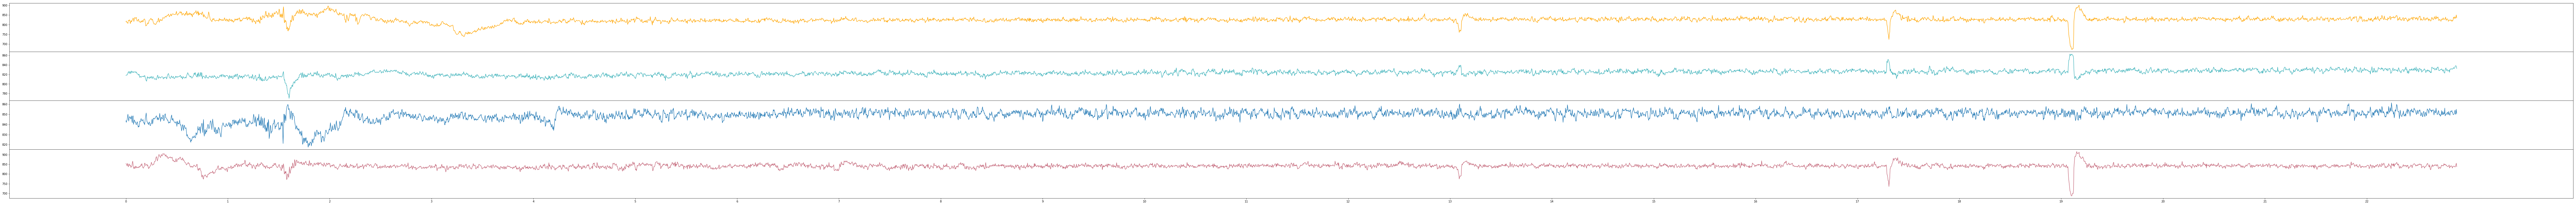

In [12]:
def plot_muse(l_ear_arr, l_forehead_arr, r_forehead_arr, r_ear_arr):
    t = [i / 256.0 for i in range(0, len(l_ear_arr))]

    plt.rcParams['figure.figsize'] = [140, 12]

    fig = plt.figure()

    l_ear_ax =      fig.add_axes([0.1, 0.7, 0.9, 0.2])
    l_forehead_ax = fig.add_axes([0.1, 0.5, 0.9, 0.2])
    r_forehead_ax = fig.add_axes([0.1, 0.3, 0.9, 0.2])
    r_ear_ax =      fig.add_axes([0.1, 0.1, 0.9, 0.2])

    l_ear_ax.plot(t, l_ear_arr, color='#FFA500')
    l_forehead_ax.plot(t, l_forehead_arr, color='#3CB2BA')
    r_forehead_ax.plot(t, r_forehead_arr)
    r_ear_ax.plot(t, r_ear_arr, color='#C46679')

    plt.xticks(np.arange(t[0], t[-1], 1.0))

    fig.show()

plot_muse(l_ear_arr, l_forehead_arr, r_forehead_arr, r_ear_arr)

First of all, what exactly is EEG? EEG is a measure of the electrical activity that goes on inside your brain, and the Muse acts as a voltmeter to pick up your brain's voltages. But electricity is a ***field*** and is made of 'waves', so it propogates through space, just like sound waves through air.

What does this mean? Well, for a start, your laptop, the lights in this room, literally everything that runs on electricity is creating an electric field! Specifically, these electric fields *oscillate* at 60 times per second, or 60 **hertz** (Hz). So in your recording, you'll notice a *component* of the EEG oscillating at 60Hz!

Note that actual EEG we are interested in analyzing rarely goes above 59Hz, so we can just remove any signal above 59Hz! You can do that like this:

```
b, a = biosppy_tools.get_filter(
                ftype='FIR',
                band='lowpass',
                order=8,
                frequency=59.0,
                sampling_rate=256.0)

filtered_data, _ = biosppy_tools._filter_signal(b, a,
                                                signal=data,
                                                check_phase=True,
                                                axis=0)
```

Try it out, and see what happens! :D

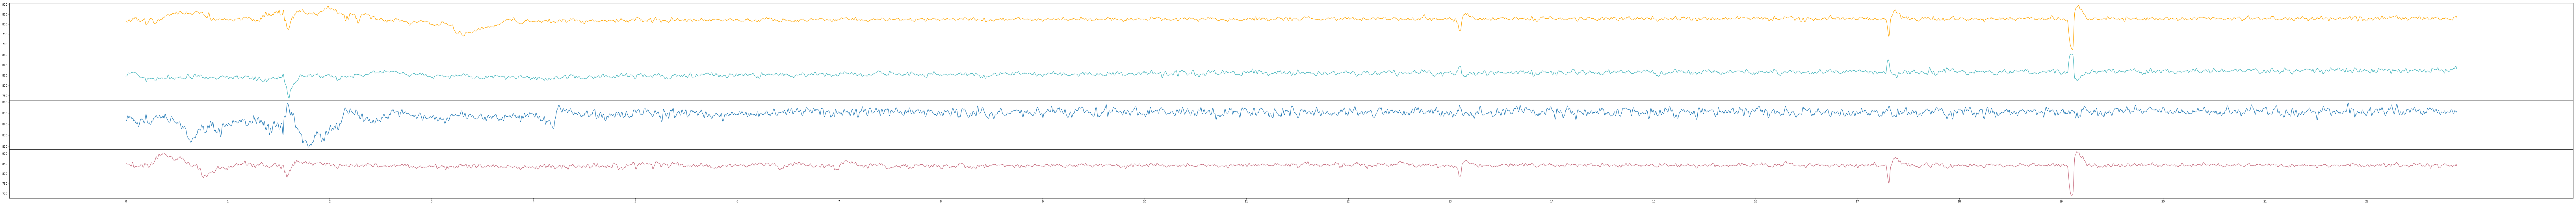

In [16]:
def lowpass_forty_hz(data):
    b, a = biosppy_tools.get_filter(
                    ftype='FIR',
                    band='lowpass',
                    order=8,
                    frequency=59.0,
                    sampling_rate=256.0)

    filtered_data, _ = biosppy_tools._filter_signal(b, a,
                                                    signal=data,
                                                    check_phase=True,
                                                    axis=0)
    return filtered_data

l_ear_filt = lowpass_forty_hz(l_ear_arr)
l_forehead_filt = lowpass_forty_hz(l_forehead_arr)
r_forehead_filt = lowpass_forty_hz(r_forehead_arr)
r_ear_filt = lowpass_forty_hz(r_ear_arr)

plot_muse(l_ear_filt, l_forehead_filt, r_forehead_filt, r_ear_filt)

Woah ... that worked like **magic**!! In fact, what do we even mean when we say there is a 60Hz component in the EEG? Let's find out! But before we do that, let's review some calculus ... specifically let's try to approximate this function over here:

```
f(x) = 
```

That looks pretty good, but we can do better! Note that the 0Hz component is the same as a sine wave with a period of 1/0 seconds ... pretty much a straight line! Essentially the 0Hz component shifts the graph up and down. We really don't care about that either ... so let's try removing it!